## Importing libraries and dataset

In [171]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [172]:
allGenres = pd.read_csv(
    'C:\\Users\\radwa\\Documents\\Cours\\2ème\\Semestre 2\\Machine learning\\JNTB\\datasets\\music\\data.csv')
# data2 = pd.read_csv('C:\\Users\\radwa\\Documents\\Cours\\2ème\\Semestre 2\\Machine learning\\JNTB\\datasets\\music\\data_2genre.csv')
df_ylabels = allGenres['label']

In [173]:
allGenres.describe()

,tempo,beats,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,...,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,119.601702,57.138000,0.378656,0.130929,2201.834226,2242.559613,4571.702159,0.103637,-144.479173,99.552199,...,-6.021121,4.471604,-4.797232,1.781547,-3.870275,1.147988,-3.967431,0.507303,-2.328779,-1.094875
std,28.297367,14.225728,0.081689,0.065685,715.961347,526.337663,1574.770035,0.041834,100.235661,31.331904,...,6.819018,6.717312,6.170919,5.009489,4.874423,4.579110,4.550650,3.869088,3.755574,3.837561
min,54.978391,18.000000,0.171782,0.005276,569.930721,897.994319,749.062137,0.021701,-552.064063,-1.527148,...,-28.052265,-15.805227,-27.542309,-12.598773,-17.545474,-15.693589,-17.227765,-11.975698,-18.504188,-19.935203
25%,99.384014,47.000000,0.319641,0.086625,1627.793931,1907.136505,3380.956639,0.070281,-200.695133,76.811480,...,-10.966826,-0.551576,-9.363372,-1.640080,-7.164838,-1.857098,-7.194297,-2.003979,-4.670281,-3.368000
50%,117.453835,56.000000,0.383075,0.122448,2209.468780,2221.408983,4658.671830,0.099539,-120.206072,98.452551,...,-5.920161,3.891842,-4.199810,1.879424,-3.614473,1.211944,-4.059109,0.669788,-2.391261,-1.155198
75%,135.999178,65.250000,0.435974,0.175793,2691.969702,2578.474352,5534.197785,0.132007,-73.895019,119.893638,...,-1.004241,9.706133,-0.161017,5.155264,-0.323536,4.350694,-0.842968,3.112518,0.149070,1.303739
max,234.907670,117.000000,0.663573,0.398012,4434.439444,3509.578677,8676.405868,0.274829,42.034587,193.096518,...,17.421038,23.037571,13.054333,18.161663,12.357588,13.468803,11.489994,15.379257,14.686910,15.368966


In [174]:
allGenres.sample(10)

,filename,tempo,beats,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
491,hiphop.00049.au,129.199219,63,0.484340,0.288945,3084.295244,3055.524911,6682.134594,0.108720,-44.522465,...,4.560806,5.525238,1.315853,2.345875,-0.804446,-4.252529,-3.567664,-3.824420,-4.429430,hiphop
296,country.00036.au,112.347147,56,0.344660,0.022725,1826.924934,2050.394029,3646.994614,0.084825,-339.794049,...,-2.883340,-6.157088,-1.850731,-5.354363,-8.309541,-10.727866,-7.735629,-3.439420,-6.959964,country
398,disco.00097.au,129.199219,64,0.415096,0.108158,2825.996741,2680.482804,6233.503974,0.120496,-116.937825,...,13.423379,-13.248121,8.257849,-15.253788,9.842587,-6.225198,8.010873,-8.037455,4.407559,disco
77,blues.00070.au,143.554688,72,0.322734,0.106164,2159.546654,2130.376826,4685.046670,0.098349,-133.015981,...,6.791205,-11.727092,4.397390,-6.039441,1.966114,-12.320324,3.253893,-8.809824,-3.379920,blues
707,pop.00023.au,103.359375,48,0.393404,0.210742,3759.753679,3293.733613,7855.044168,0.177674,-44.257500,...,1.321999,-1.947375,-0.448469,0.233977,-2.005988,-1.966861,-1.036370,0.514916,-0.384858,pop
825,reggae.00000.au,123.046875,59,0.328909,0.094189,2133.340149,2289.897248,4801.762631,0.097811,-159.453455,...,9.711855,-10.072362,1.418725,-6.505015,1.074712,-9.212256,3.282848,-0.765541,3.763479,reggae
132,classical.00076.au,172.265625,84,0.260483,0.058851,1340.270643,1538.935291,2521.984750,0.071713,-238.582236,...,-0.116471,2.518272,0.681765,0.068461,1.705275,0.652181,1.468415,-1.831407,-6.244635,classical
783,pop.00052.au,103.359375,50,0.522647,0.321615,3662.949570,3276.425158,7776.827975,0.156007,-39.992814,...,3.269956,0.070456,0.960737,7.645055,7.631924,9.409010,6.590607,1.179717,-0.646149,pop
55,blues.00023.au,184.570312,92,0.280714,0.102002,1210.197917,1497.822809,2522.101416,0.052483,-227.264777,...,-9.432815,-10.916915,3.569436,4.139583,0.092946,-2.972928,-1.376940,7.550499,-3.032518,blues
759,pop.00018.au,123.046875,60,0.409980,0.207528,3433.787190,3405.605414,7932.260368,0.127735,-48.944438,...,-0.746042,-0.379076,-0.478399,0.647580,1.713454,1.353029,1.909663,3.849851,1.613374,pop


In [175]:
allGenres.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   filename            1000 non-null   object 
 1   tempo               1000 non-null   float64
 2   beats               1000 non-null   int64  
 3   chroma_stft         1000 non-null   float64
 4   rmse                1000 non-null   float64
 5   spectral_centroid   1000 non-null   float64
 6   spectral_bandwidth  1000 non-null   float64
 7   rolloff             1000 non-null   float64
 8   zero_crossing_rate  1000 non-null   float64
 9   mfcc1               1000 non-null   float64
 10  mfcc2               1000 non-null   float64
 11  mfcc3               1000 non-null   float64
 12  mfcc4               1000 non-null   float64
 13  mfcc5               1000 non-null   float64
 14  mfcc6               1000 non-null   float64
 15  mfcc7               1000 non-null   float64
 16  mfcc8  

In [176]:
allGenres['label'].value_counts()

blues        100
classical    100
country      100
disco        100
hiphop       100
jazz         100
metal        100
pop          100
reggae       100
rock         100
Name: label, dtype: int64

### Removing useless feature

In [177]:
allGenres.drop('filename', inplace=True, axis=1)

In [178]:
allGenres.sample(10)

,tempo,beats,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
684,172.265625,83,0.443969,0.092050,2644.707345,2267.926389,5176.768697,0.141647,-104.962497,80.722581,...,11.059757,-15.279959,5.312950,-14.506225,4.757283,-11.460761,-0.112011,-6.508919,-2.668230,metal
592,95.703125,46,0.274069,0.069789,1169.415464,1498.274612,2444.151887,0.042350,-261.790867,139.533488,...,-2.189748,4.471136,-0.315947,0.110011,-0.276825,1.987967,-2.634939,-1.158770,-5.372113,jazz
809,75.999540,36,0.487691,0.080526,1814.033483,2187.794188,4067.933735,0.070478,-239.158416,98.961743,...,16.057058,2.802922,5.942783,-6.305525,-1.036331,-6.343343,2.148890,-6.638486,-5.261894,reggae
857,135.999178,66,0.358643,0.095344,2104.860423,2311.407623,4381.448506,0.077862,-194.768905,83.037282,...,8.805317,1.411787,5.411317,2.752176,5.248267,1.645211,0.509538,1.143304,-1.559973,reggae
55,184.570312,92,0.280714,0.102002,1210.197917,1497.822809,2522.101416,0.052483,-227.264777,137.762370,...,-9.432815,-10.916915,3.569436,4.139583,0.092946,-2.972928,-1.376940,7.550499,-3.032518,blues
157,161.499023,79,0.239079,0.018685,1157.889858,1320.769334,2181.978473,0.070669,-405.673814,145.707311,...,2.440667,5.080262,2.387398,1.868199,2.499296,1.519765,-2.263747,-1.442391,2.613460,classical
89,80.749512,40,0.274009,0.081352,1817.516386,1973.739070,3944.451148,0.079215,-213.180803,115.152794,...,3.784770,0.225669,-5.113638,-0.413063,-1.184538,-1.920714,-2.293728,2.891266,-4.233204,blues
518,86.132812,42,0.220782,0.087849,1987.817578,2099.945002,4315.540571,0.080074,-188.079698,98.638113,...,18.290255,4.643510,9.832783,-5.500709,2.126709,-6.254231,-3.413016,-2.989055,2.212496,jazz
712,75.999540,36,0.334941,0.195700,2525.971548,2848.668079,5554.558079,0.103542,-73.339769,97.464463,...,-4.917738,-0.026356,-3.043840,-0.159194,-2.382945,0.721218,0.683257,1.969334,0.805738,pop
491,129.199219,63,0.484340,0.288945,3084.295244,3055.524911,6682.134594,0.108720,-44.522465,41.630215,...,4.560806,5.525238,1.315853,2.345875,-0.804446,-4.252529,-3.567664,-3.824420,-4.429430,hiphop


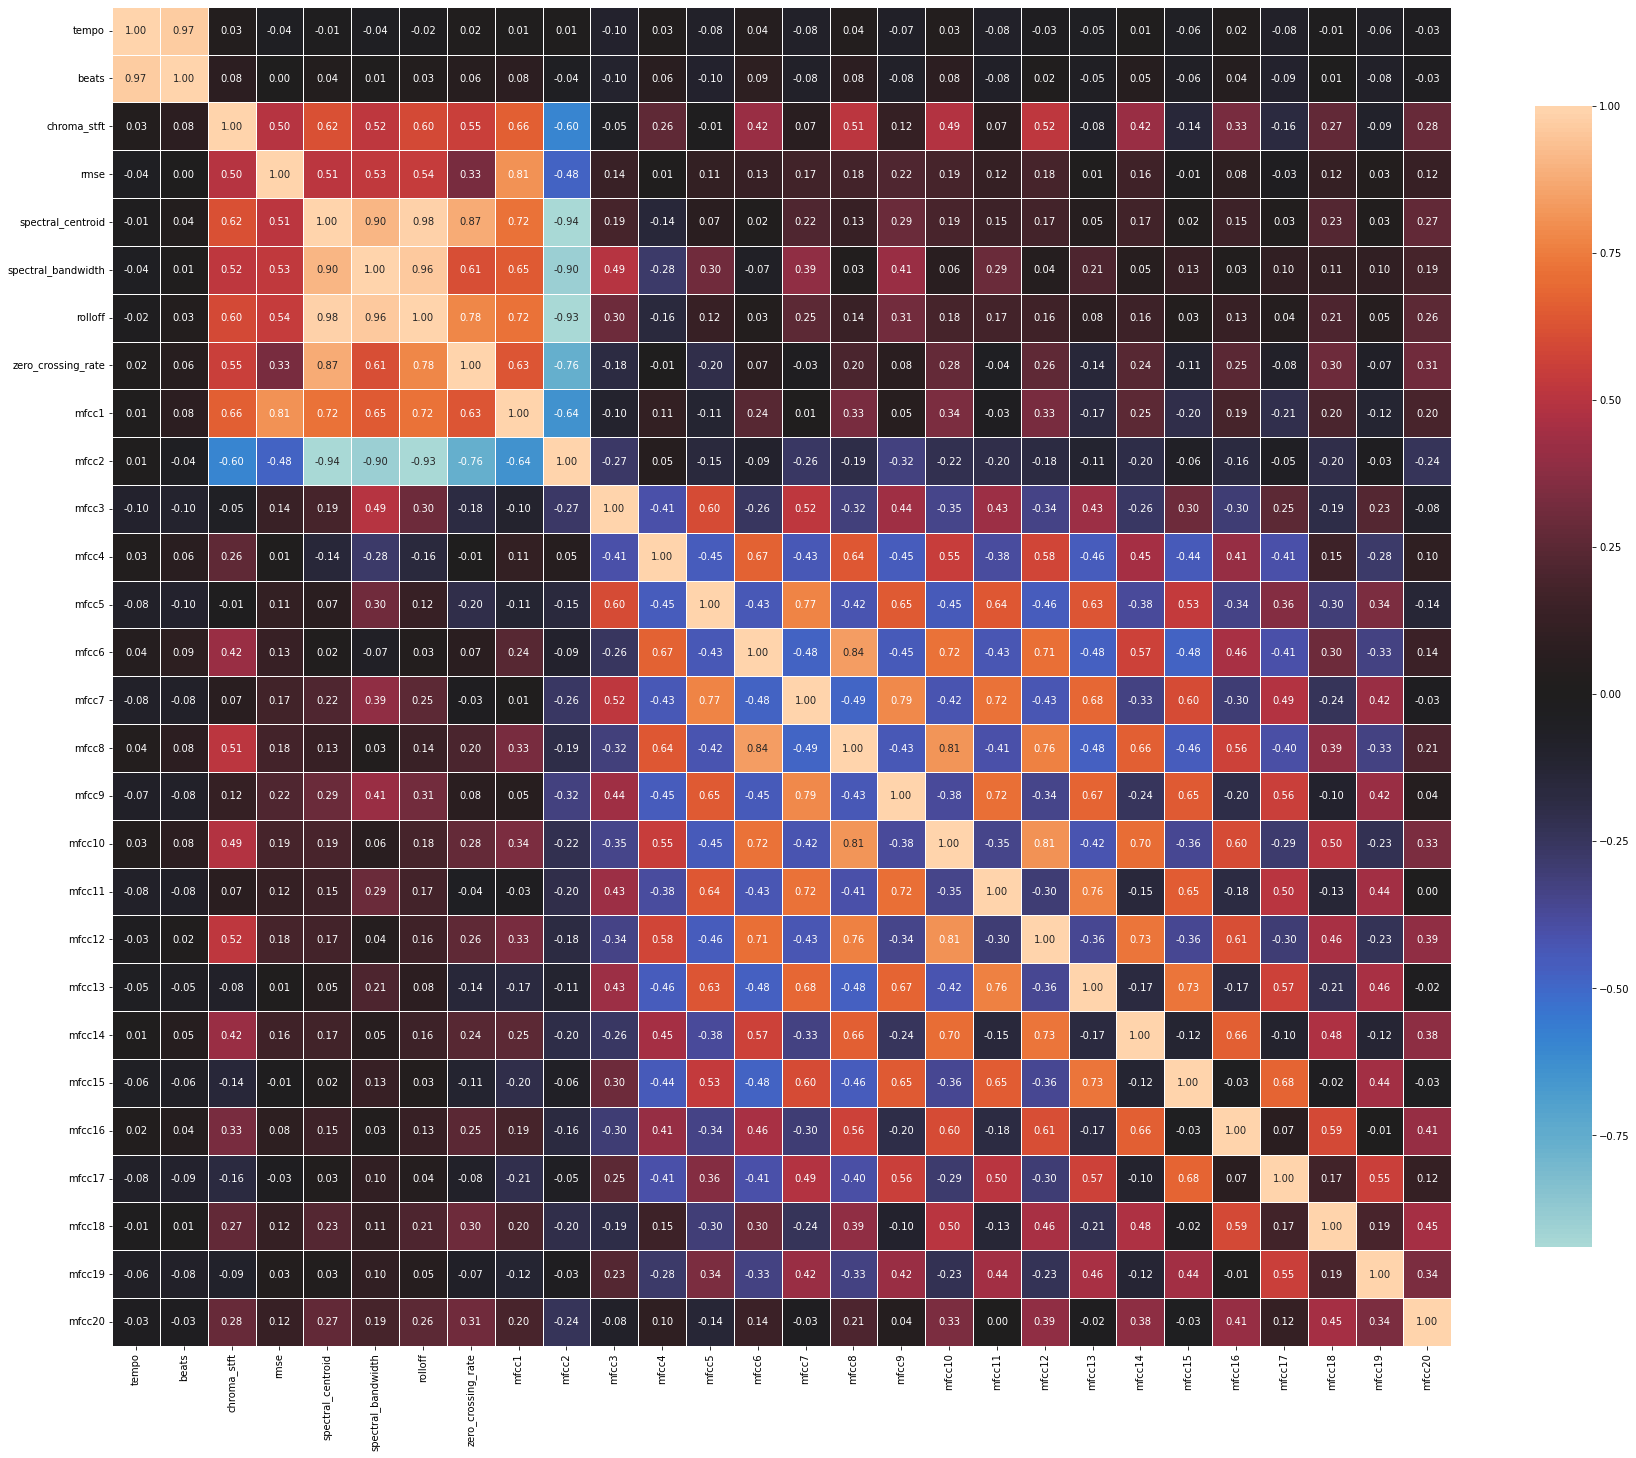

In [179]:
correlations = allGenres.corr()

fig, ax = plt.subplots(figsize=(30, 30))
sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f',
            square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})
plt.show();

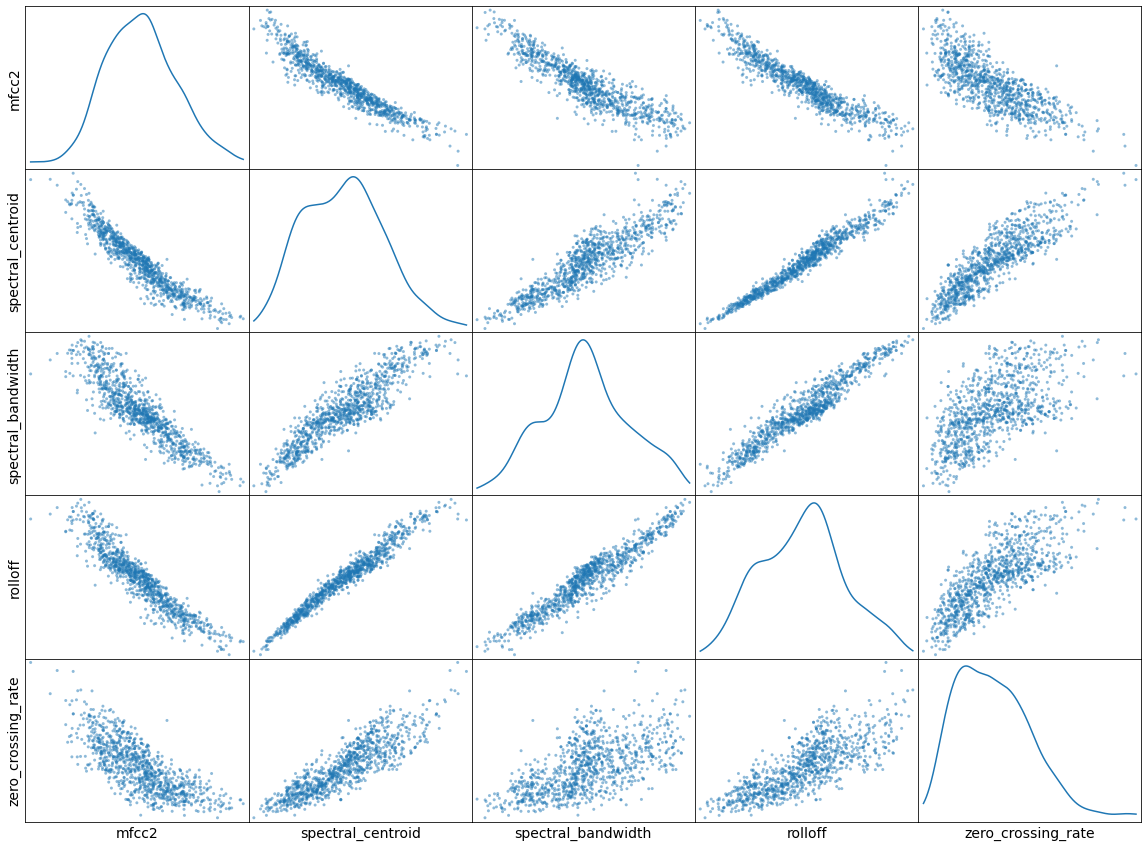

In [180]:
from pandas.plotting import scatter_matrix

attributes = ["mfcc2", "spectral_centroid",
              "spectral_bandwidth", "rolloff", "zero_crossing_rate"]
sm = scatter_matrix(allGenres[attributes], figsize=(20, 15), diagonal="kde");

#Hide all ticks
[s.set_xticks(()) for s in sm.reshape(-1)];
[s.set_yticks(()) for s in sm.reshape(-1)];

for x in sm.ravel():
    x.set_xlabel(x.get_xlabel(), fontsize=14)
    x.set_ylabel(x.get_ylabel(), fontsize=14)

## Split data into test data and train data

In [181]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

allGenres['label'] = label_encoder.fit_transform(allGenres['label'].astype(str))
allGenres

,tempo,beats,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,103.359375,50,0.380260,0.248262,2116.942959,1956.611056,4196.107960,0.127272,-26.929785,107.334008,...,14.336612,-13.821769,7.562789,-6.181372,0.330165,-6.829571,0.965922,-7.570825,2.918987,0
1,95.703125,44,0.306451,0.113475,1156.070496,1497.668176,2170.053545,0.058613,-233.860772,136.170239,...,-2.250578,3.959198,5.322555,0.812028,-1.107202,-4.556555,-2.436490,3.316913,-0.608485,0
2,151.999081,75,0.253487,0.151571,1331.073970,1973.643437,2900.174130,0.042967,-221.802549,110.843070,...,-13.037723,-12.652228,-1.821905,-7.260097,-6.660252,-14.682694,-11.719264,-11.025216,-13.387260,0
3,184.570312,91,0.269320,0.119072,1361.045467,1567.804596,2739.625101,0.069124,-207.208080,132.799175,...,-0.613248,0.384877,2.605128,-5.188924,-9.527455,-9.244394,-2.848274,-1.418707,-5.932607,0
4,161.499023,74,0.391059,0.137728,1811.076084,2052.332563,3927.809582,0.075480,-145.434568,102.829023,...,7.457218,-10.470444,-2.360483,-6.783623,2.671134,-4.760879,-0.949005,0.024832,-2.005315,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,123.046875,59,0.418812,0.166056,2312.030070,2060.825761,4528.197619,0.140588,-41.402023,105.403012,...,11.303100,-14.155566,2.824157,-9.477822,3.331261,-8.200088,3.693091,-3.673562,-0.163201,9
996,117.453835,56,0.335774,0.093676,2553.856706,2219.090892,5123.752351,0.136173,-121.410791,89.522283,...,9.149520,-10.112054,4.211237,-9.349345,1.609701,-10.553566,1.066489,-1.654875,7.544224,9
997,103.359375,45,0.372834,0.208743,1345.850763,1841.748033,2939.265560,0.041099,-127.946876,134.443879,...,11.043714,-8.385375,2.111019,-6.338260,0.997383,-5.325869,-0.842192,-4.665996,-4.787677,9
998,112.347147,45,0.344472,0.180163,1675.475369,1653.422860,3253.563659,0.087294,-98.356322,136.611573,...,2.945863,-12.509212,0.091337,-0.774780,-5.700102,-8.630916,-1.903803,-2.196753,-3.395148,9


In [182]:
df_x = allGenres.drop('label', axis=1)
df_y = allGenres['label']

In [183]:
df_x.sample(5)

,tempo,beats,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,...,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20
523,135.999178,67,0.269971,0.061388,1875.044961,2569.416577,4292.274045,0.054154,-217.625051,105.630026,...,-6.155871,-7.740072,0.416865,-1.262606,1.711064,-2.300867,-3.805853,-3.679802,0.576207,0.568502
73,103.359375,51,0.263129,0.086982,1120.387619,1447.839934,2325.102607,0.047298,-274.288785,130.417424,...,3.783482,0.080915,-0.939682,2.295373,4.290512,-1.661926,-10.444825,-6.797826,-1.068164,-1.596130
248,86.132812,42,0.250902,0.092585,1537.614201,1716.081352,3054.864861,0.068124,-213.567469,117.228544,...,-14.163280,-1.150015,-10.305500,-4.049726,-6.637212,-5.421159,-9.715488,-3.204672,-4.448883,-9.154215
717,117.453835,54,0.480738,0.234553,2569.175433,2559.460151,5351.725972,0.131656,9.699896,88.826504,...,-6.208671,-2.973092,-1.813722,-0.322956,-1.345462,-1.678960,-0.183631,1.719161,-0.128784,-3.899762
206,112.347147,55,0.352270,0.087165,1327.831388,1632.974506,2756.025001,0.061087,-217.141958,136.159248,...,-5.415249,3.623719,-2.809271,-0.351482,-0.553418,0.370173,-2.248748,-2.495414,4.188593,0.342444


In [184]:
df_y.sample(5)

580    5
447    4
410    4
119    1
685    6
Name: label, dtype: int32

In [185]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2)

## Apply PCA

In [186]:
from sklearn.decomposition import PCA
import statsmodels.api as sm


def apply_pca(X, n, add_constant=False):
    pca = PCA(n_components=n)
    x_new = pca.fit_transform(X)

    if add_constant is True:
        x_new = sm.add_constant(x_new)

    return pca, pd.DataFrame(x_new)

In [187]:
pca, _ = apply_pca(df_x, len(list(df_x.columns)))

In [188]:
print("Explained Variance:", pca.explained_variance_ratio_)

Explained Variance: [9.84904058e-01 1.06458260e-02 2.45374986e-03 1.37770967e-03
 3.00765182e-04 1.20648586e-04 5.27146450e-05 3.84803675e-05
 2.48200484e-05 1.69918938e-05 1.43485887e-05 8.35947933e-06
 6.18139057e-06 5.31435976e-06 4.88096859e-06 4.24544157e-06
 3.75477384e-06 3.35515255e-06 2.80529798e-06 2.53277334e-06
 2.05861853e-06 1.87874819e-06 1.65127948e-06 1.55481981e-06
 1.31308247e-06 5.94669474e-10 2.52241036e-10 2.04759753e-11]


Text(0, 0.5, 'cumulative variance')

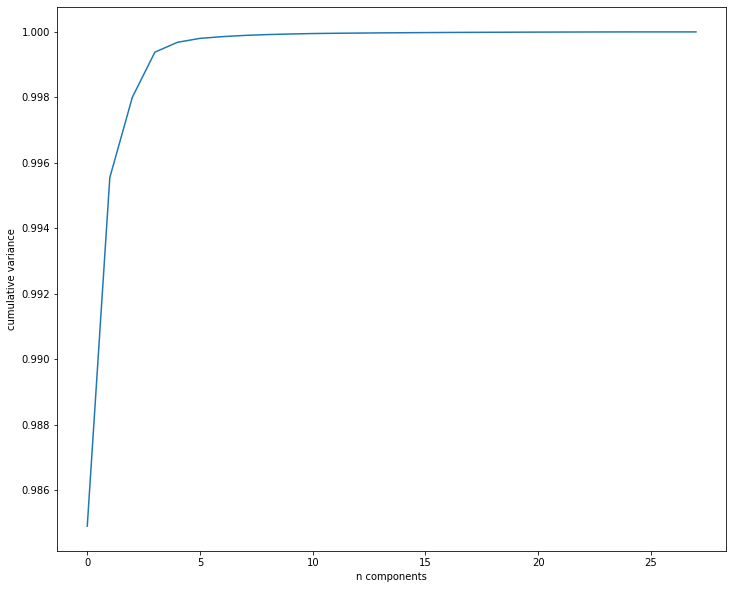

In [189]:
plt.figure(figsize=(12, 10))

plt.plot(np.cumsum(pca.explained_variance_ratio_))

plt.xlabel('n components')
plt.ylabel('cumulative variance')

In [190]:
pca = PCA(n_components=3)
musicPCA = pca.fit_transform(df_x)

In [191]:
print("Explained Variance:", pca.explained_variance_ratio_)

Explained Variance: [0.98490406 0.01064583 0.00245375]


In [192]:
# pca = PCA(n_components = 4)
# musicPCA = pca.fit_transform(df_x)
# print("Explained Variance:", pca.explained_variance_ratio_)

In [193]:
componentDf = pd.DataFrame(data=musicPCA, columns=['pc1', 'pc2', 'pc3'])

In [194]:
musicPCA = pd.concat([componentDf, df_ylabels], axis=1)

In [195]:
musicPCA

,pc1,pc2,pc3,label
0,-437.764309,194.339340,-70.976368,blues
1,-2724.658925,-2.261800,29.199490,blues
2,-1882.730034,-283.925766,58.805190,blues
3,-2125.187321,56.204873,-67.131142,blues
4,-770.057069,-73.147524,-70.060711,blues
...,...,...,...,...
995,-42.045653,223.432171,-35.689699,rock
996,615.406676,223.774566,-40.387723,rock
997,-1876.311153,-166.221397,-44.773838,rock
998,-1524.013912,179.354200,-76.103476,rock


In [196]:
df_y.rename("label2", inplace=True)

df_y2 = pd.concat([df_ylabels, df_y], axis=1)
# df_y2.rename(columns = {"label" : "dawa", "label":"oui"},inplace=True)
df_y2

,label,label2
0,blues,0
1,blues,0
2,blues,0
3,blues,0
4,blues,0
...,...,...
995,rock,9
996,rock,9
997,rock,9
998,rock,9


In [197]:
def legend_without_duplicate_labels(ax):
    handles, labels = ax.get_legend_handles_labels()
    unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels)) if l not in labels[:i]]
    ax.legend(*zip(*unique))

Text(0, 0.5, 'Principal Component 2')

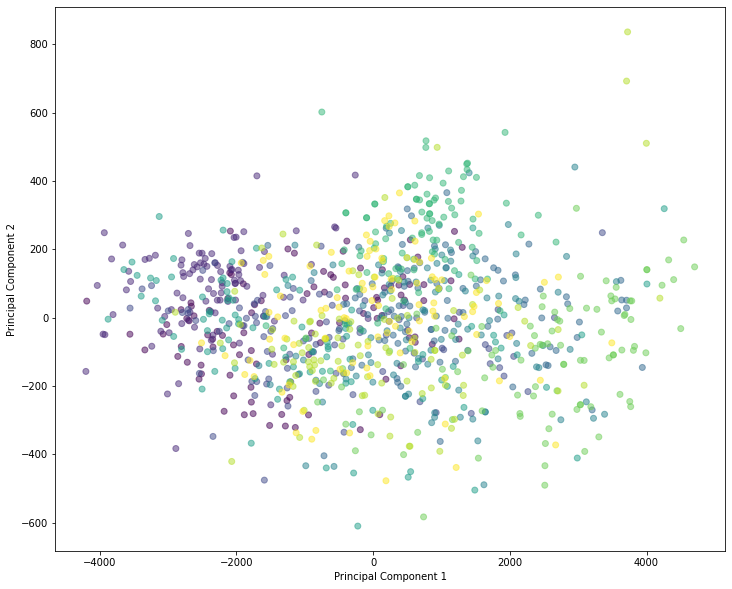

In [198]:
fig, ax = plt.subplots(figsize=(12, 10))

# ax.scatter(withLabelsDf['pc1'],withLabelsDf['pc2'], c = withLabelsDf['label'],label = df_ylabels)
ax.scatter(musicPCA['pc1'], musicPCA['pc2'], c=df_y2['label2'], label=df_y2['label'], alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
# #
# # for index, color in df_y2.iterrows():
# #     n = 750
# #     # print(color['label2'])
# #     x, y = np.random.rand(2, n)
# #     scale = 200.0 * np.random.rand(n)
# #     ax.scatter(x, y, c=color['label2'], s=scale, label=color['label'],
# #                alpha=0.3, edgecolors='none')
# from collections import OrderedDict
#
# by_label = OrderedDict(zip(df_y2['label'],df_y2['label2']))
# plt.legend(by_label.values(), by_label.keys())


In [199]:
import plotly.express as px

fig = px.scatter(musicPCA, x=musicPCA['pc1'], y=musicPCA['pc2'], color=musicPCA['label'])
fig.show()

In [201]:
fig = px.scatter_3d(musicPCA,  x=musicPCA['pc1'], y=musicPCA['pc2'],  z=musicPCA['pc3'], color=musicPCA['label'])
fig.show()

## Build Model and Helper Functions

In [ ]:
result_dict = {}

In [ ]:
from sklearn.metrics import *


def summarize_classification(y_test, y_pred):
    acc = accuracy_score(y_test, y_pred, normalize=True)
    num_acc = accuracy_score(y_test, y_pred, normalize=False)

    prec = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')

    return {'accuracy': acc,
            'precision': prec,
            'recall': recall,
            'accuracy_count': num_acc}

In [ ]:
def summarize_classification(y_test, y_pred):
    acc = accuracy_score(y_test, y_pred, normalize=True)
    num_acc = accuracy_score(y_test, y_pred, normalize=False)

    prec = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')

    return {'accuracy': acc,
            'precision': prec,
            'recall': recall,
            'accuracy_count': num_acc}

In [ ]:
def build_model(classifier_fn,
                name_of_y_col,
                names_of_x_cols,
                dataset,
                test_frac=0.2):
    X = dataset[names_of_x_cols]
    Y = dataset[name_of_y_col]

    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=test_frac)

    model = classifier_fn(x_train, y_train)

    y_pred = model.predict(x_test)

    y_pred_train = model.predict(x_train)

    train_summary = summarize_classification(y_train, y_pred_train)
    test_summary = summarize_classification(y_test, y_pred)

    pred_results = pd.DataFrame({'y_test': y_test,
                                 'y_pred': y_pred})

    model_crosstab = pd.crosstab(pred_results.y_pred, pred_results.y_test)

    return {'training': train_summary,
            'test': test_summary,
            'confusion_matrix': model_crosstab}

In [ ]:
def compare_results():
    for key in result_dict:
        print('Classification: ', key)

        print()
        print('Training data')
        for score in result_dict[key]['training']:
            print(score, result_dict[key]['training'][score])

        print()
        print('Test data')
        for score in result_dict[key]['test']:
            print(score, result_dict[key]['test'][score])

        print()

### SGD Function

In [ ]:
from sklearn.linear_model import SGDClassifier


def sgd_fn(x_train, y_train, max_iter=1000, tol=1e-3):
    model = SGDClassifier(max_iter=max_iter, tol=tol)
    model.fit(x_train, y_train)

    return model

In [ ]:
musicPCA_labels = musicPCA

label_encoding = preprocessing.LabelEncoder()
musicPCA['label'] = label_encoding.fit_transform((musicPCA['label']).astype(str))


In [ ]:
FEATURES = list(musicPCA.columns[1:])



In [ ]:
result_dict['genres ~ sgd'] = build_model(sgd_fn,
                                          'label',
                                          FEATURES,
                                          musicPCA)
print(result_dict['genres ~ sgd']['confusion_matrix'])
compare_results()

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression


def logistic_fn(x_train, y_train):
    model = LogisticRegression(solver='liblinear')
    model.fit(x_train, y_train)

    return model

In [ ]:
result_dict['genres ~ logistic'] = build_model(logistic_fn,
                                               'label',
                                               FEATURES,
                                               musicPCA)
print(result_dict['genres ~ sgd']['confusion_matrix'])
compare_results()

### Linear discriminant analysis

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


def linear_discriminant_fn(x_train, y_train, solver='svd'):
    model = LinearDiscriminantAnalysis(solver=solver)
    model.fit(x_train, y_train)

    return model

In [ ]:
result_dict['genres ~ linear_discriminant_analysis'] = build_model(linear_discriminant_fn,
                                                                   'label',
                                                                   FEATURES,
                                                                   musicPCA)
compare_results()

### Linear SVC

In [ ]:
from sklearn.svm import LinearSVC


def linear_svc_fn(x_train, y_train, C=1.0, max_iter=1000, tol=1e-3):
    model = LinearSVC(C=C, max_iter=max_iter, tol=tol, dual=False)
    model.fit(x_train, y_train)

    return model

In [ ]:
result_dict['genres ~ linear_svc'] = build_model(linear_svc_fn,
                                                 'label',
                                                 FEATURES,
                                                 musicPCA)

compare_results()

### Radius Neighbors Regression

In [ ]:
from sklearn.neighbors import RadiusNeighborsClassifier


def radius_neighbor_fn(x_train, y_train, radius=200):
    model = RadiusNeighborsClassifier(radius=radius)
    model.fit(x_train, y_train)

    return model

In [ ]:
result_dict['genres ~ radius_neighbors'] = build_model(radius_neighbor_fn,
                                                       'label',
                                                       FEATURES,
                                                       musicPCA)
compare_results()

### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier


def decision_tree_fn(x_train, y_train, max_depth=None, max_features=None):
    model = DecisionTreeClassifier(max_depth=max_depth, max_features=max_features)
    model.fit(x_train, y_train)

    return model

In [ ]:
result_dict['genres ~ decision_tree'] = build_model(decision_tree_fn,
                                                    'label',
                                                    FEATURES,
                                                    musicPCA)

compare_results()

### Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB


def naive_bayes_fn(x_train, y_train, priors=None):
    model = GaussianNB(priors=priors)
    model.fit(x_train, y_train)

    return model

In [ ]:
result_dict['genres ~ naive_bayes'] = build_model(naive_bayes_fn,
                                                    'label',
                                                    FEATURES,
                                                    musicPCA)

compare_results()